In [0]:
import numpy as np
import matplotlib.pyplot as plt
import itertools
import numpy as np

Three memory patterns

In [0]:
x1=np.array([-1,-1,1,-1,1,-1,-1,1],dtype=float)
x2=np.array([-1,-1,-1,-1,-1,1,-1,-1],dtype=float)
x3=np.array([-1,1,1,-1,-1,1,-1,1],dtype=float)

In [0]:
patterns=np.array([x1,x2,x3])

In [0]:
#Creation of the weight matrix

def weight_matrix(patterns,scaling):
  n=len(patterns[0])
  P=len(patterns)
  W=np.zeros((n,n))
  for i in range (n):
    for j in range(n):
     #if j==i:
        #W[i,j]=0
        #continue
      somme=0
      for mu in range(P):
        x_mu=patterns[mu]
        somme = somme + x_mu[i]*x_mu[j]
      W[i,j]=somme
      if scaling==True:
        W[i,j]=W[i,j]/n # if scale is True, we scale with the number of units
  return W

In [0]:
W1=weight_matrix(patterns,scaling=True)
W2=weight_matrix(patterns,scaling=False)

Energy

In [0]:
def energy(x,W):
  n=len(x)
  somme=0
  for i in range(n): 
    for j in range(n):
      somme+=W[i,j]*x[i]*x[j]
  return -somme

Update rule

In [0]:
def sign(x):
  if x>=0:
    return 1
  else:
    return -1

In [0]:
#this function updates just a single vector one time in batch mode - Use this function Hopfield Little Model
def one_update_rule_batch1(x,W):
  new = np.dot(W,x)
  new[new>=0]=1
  new[new<0]=-1
  return new

In [0]:
#this function updates just a single vector one time in batch mode - Use this function Hopfield Little Model
def one_update_rule_batch(x,W):
  new = np.dot(W,x)
  for i in range(len(new)):
    new[i]=sign(new[i])
  return new

In [0]:
#this function sequentially updates just a single vector one time

def one_update_rule_sequential(x,W):
        dimension = x.shape[0]
        new = np.copy(x)
        for i in range(dimension):
            sum_ = 0
            for j in range(dimension):
                sum_ += np.multiply(W[i][j], new[j])
            if sum_ < 0:
                new[i] = -1
            else:
                new[i] = 1
        return new

In [0]:
def one_update_rule_random(x,W):
  N=len(x)
  new_x=np.copy(x)
  for count in range(N):
    i = np.random.randint(0,N)
    quantity = W[i,:].dot(x)
    new_x[i]=sign(quantity)
  return new_x

In [0]:
#this function updates just a single vector until convergence and returns the new vector as well as the number of iterations before convergence

def update_rule(x,W,update,display=False):
  list_x=[]
  max_iter=50
  energy_list=[]
  iterations=0
  condition=True
  x_before=np.copy(x)
  while(condition):
    if iterations%10==0 and iterations!=0:
      print("Iteration: ",iterations)
    if iterations == max_iter:
      break
    #print(np.count_nonzero(np.array(x_before)-np.array(x_after)))
    if update=="batch":
      x_after=one_update_rule_batch(x_before,W)
    elif update=="sequential":
      x_after=one_update_rule_sequential(x_before,W)
    elif update=="random":
      x_after=one_update_rule_random(x_before,W)
      if display==True:
        display_pattern(x_after)
    if x_after.tolist() in list_x and not np.all(x_after==x_before):
      print("oscillations")
    list_x.append(x_after.tolist())
    iterations+=1
    energy_list.append(energy(x_after,W))
    condition=not np.all(x_after==x_before)
    x_before=np.copy(x_after)
    #print(energy(x_after,W))
  return x_after,iterations,energy_list,list_x

In [0]:
for x in patterns:
  print("Old pattern was ",x," updated pattern is ",update_rule(x,W2,"batch")[0])
  if (np.array_equal(x,update_rule(x,W2,"batch")[0])):
    print("They're the same")

Old pattern was  [-1. -1.  1. -1.  1. -1. -1.  1.]  updated pattern is  [-1. -1.  1. -1.  1. -1. -1.  1.]
They're the same
Old pattern was  [-1. -1. -1. -1. -1.  1. -1. -1.]  updated pattern is  [-1. -1. -1. -1. -1.  1. -1. -1.]
They're the same
Old pattern was  [-1.  1.  1. -1. -1.  1. -1.  1.]  updated pattern is  [-1.  1.  1. -1. -1.  1. -1.  1.]
They're the same


The network is able to store all three patterns

# 3 Tasks and questions 

## 3.1 Convergence and attractors

### Update rule on three distorded input patterns

In [0]:
x1d=np.array([1,-1,1,-1,1,-1,-1,1])
x2d=np.array([1,1,-1,-1,-1,1,-1,-1])
x3d=np.array([1,1,1,-1,1,1,-1,1])

In [0]:
patterns_distorded=np.array([x1d,x2d,x3d])

In [0]:
#this function updates each pattern of a set of patterns and returns the array of updated patterns as well as the number of iterations before convergence for each pattern

def update_patterns(patterns,W,update):
  list_iterations=[]
  new_patterns=[]
  for mu in range(len(patterns)):
    pattern=patterns[mu]
    new_pattern,iteration,energy_list,list_x=update_rule(pattern,W,update)
    new_patterns.append(new_pattern)
    list_iterations.append(iteration)
  return np.array(new_patterns),list_iterations

In [0]:
new_patterns,list_iterations=update_patterns(patterns_distorded,W2,"batch")

In [0]:
for i in range(len(new_patterns)):
  x=new_patterns[i]
  print("The new patterns is ",x," and the correct pattern was ",patterns[i]," The convergence takes ",list_iterations[i]," iterations")
  if (np.array_equal(x,patterns[i])):
    print("They're the same")

The new patterns is  [-1. -1.  1. -1.  1. -1. -1.  1.]  and the correct pattern was  [-1. -1.  1. -1.  1. -1. -1.  1.]  The convergence takes  2  iterations
They're the same
The new patterns is  [-1.  1. -1. -1. -1.  1. -1. -1.]  and the correct pattern was  [-1. -1. -1. -1. -1.  1. -1. -1.]  The convergence takes  2  iterations
The new patterns is  [-1.  1.  1. -1. -1.  1. -1.  1.]  and the correct pattern was  [-1.  1.  1. -1. -1.  1. -1.  1.]  The convergence takes  3  iterations
They're the same


x1d and x3d converge towards stored patterns.
After 3 iterations, x2d does not converge toward x2

### How many attractors are there in the network ?

In [0]:
# Creation of the set of all combinations of patterns

all_patterns = [list(i) for i in itertools.product([-1, 1], repeat=8)]

In [0]:
# For each combination, find the fixed point
fixed_points,list_iterations=update_patterns(all_patterns,W2,"sequential")

In [0]:
# Return the list of uniques fixed points, hence the number of attractors
attractors= np.unique(fixed_points, axis=0)
occurences=np.zeros(len(attractors))
index=0
for attractor in attractors:
  for i in range(len(fixed_points)):
    if np.array_equal(attractor,fixed_points[i]):
      occurences[index]+=1
  index+=1
print("The number of attractors in this network is ",len(attractors))

The number of attractors in this network is  14


In [0]:
attractors

array([[-1, -1, -1, -1, -1,  1, -1, -1],
       [-1, -1, -1, -1,  1, -1, -1, -1],
       [-1, -1,  1, -1, -1,  1, -1,  1],
       [-1, -1,  1, -1,  1, -1, -1,  1],
       [-1, -1,  1, -1,  1,  1, -1,  1],
       [-1,  1, -1, -1, -1,  1, -1, -1],
       [-1,  1,  1, -1, -1,  1, -1,  1],
       [-1,  1,  1, -1,  1, -1, -1,  1],
       [ 1, -1, -1,  1,  1, -1,  1, -1],
       [ 1,  1, -1,  1, -1,  1,  1, -1],
       [ 1,  1, -1,  1,  1, -1,  1, -1],
       [ 1,  1, -1,  1,  1,  1,  1, -1],
       [ 1,  1,  1,  1, -1,  1,  1,  1],
       [ 1,  1,  1,  1,  1, -1,  1,  1]])

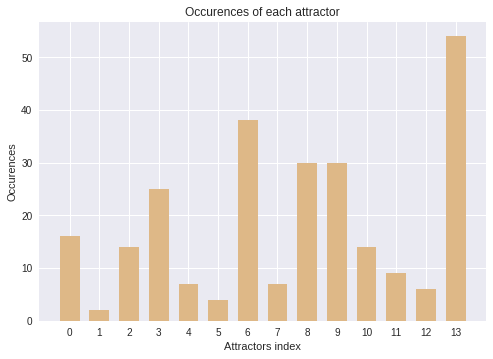

In [0]:
plt.xticks(np.arange(len(attractors)))
width = 1/1.5
plt.bar(range(len(attractors)), occurences, width, color="burlywood")
plt.xlabel("Attractors index")
plt.ylabel("Occurences")
plt.title("Occurences of each attractor")
plt.show()

### Behavior for more dissimilar starting patterns

In [0]:
# These three input patterns have 5 bit errors, compared with x1,x2 and x3

x1_very_dissimilar=np.array([1,1,-1,1,-1,-1,-1,1])
x2_very_dissimilar=np.array([1,1,1,1,1,1,-1,-1])
x3_very_dissimilar=np.array([1,-1,-1,1,1,1,-1,1])

In [0]:
patterns_very_dissimilar=np.array([x1_very_dissimilar,x2_very_dissimilar,x3_very_dissimilar])

In [0]:
new_patterns,list_iterations=update_patterns(patterns_very_dissimilar,W2,"batch")

In [0]:
for i in range(len(new_patterns)):
  x=new_patterns[i]
  print("The new patterns is ",x," and the correct pattern was ",patterns[i]," The convergence takes ",list_iterations[i]," iterations")
  if (np.array_equal(x,patterns[i])):
    print("They're the same")
  else:
    print("They are different")

The new patterns is  [ 1.  1.  1.  1.  1. -1.  1.  1.]  and the correct pattern was  [-1. -1.  1. -1.  1. -1. -1.  1.]  The convergence takes  3  iterations
They are different
The new patterns is  [ 1.  1.  1.  1.  1. -1.  1.  1.]  and the correct pattern was  [-1. -1. -1. -1. -1.  1. -1. -1.]  The convergence takes  3  iterations
They are different
The new patterns is  [ 1. -1. -1.  1.  1. -1.  1. -1.]  and the correct pattern was  [-1.  1.  1. -1. -1.  1. -1.  1.]  The convergence takes  2  iterations
They are different


It seems that if the input patterns are very dissimilar, the memory cannot recall the stored patterns

## 3.2 Sequential Update

In [0]:
pict=np.genfromtxt('/content/pict.dat', dtype = None, delimiter = ',',encoding=None)

In [0]:
# this function separate all the data in 11 patterns of size 1024

def separation(data):
  patterns=[]
  L=[]
  for i in range(len(data)):
    if i%1024==0 and i!=0:
      patterns.append(np.array(L))
      L=[]
    L.append(data[i])
  patterns.append(np.array(L))
  return patterns

In [0]:
patterns=separation(pict)

In [0]:
p1=patterns[0]
p2=patterns[1]
p3=patterns[2]
p4=patterns[3]
p5=patterns[4]
p6=patterns[5]
p7=patterns[6]
p8=patterns[7]
p9=patterns[8]
p10=patterns[9]
p11=patterns[10]

In [0]:
# this function displays each pattern as a 32x32 image

def display_pattern(pattern):
  pattern=pattern.reshape(32,32)
  plt.imshow(pattern, interpolation='nearest')
  if np.array_equal(pattern,p10.reshape(32,32)) or np.array_equal(pattern,p11.reshape(32,32)):
    plt.title("Degraded pattern")
  else:
    plt.title("Pattern")
  plt.show()

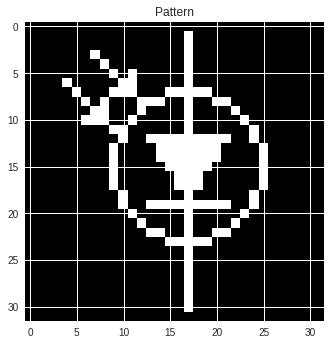

In [0]:
display_pattern(p3)

#### Learning of the first three patterns

In [0]:
training_patterns=np.array([p1,p2,p3])

In [0]:
W=weight_matrix(training_patterns,scaling=True)

### Check that the three patterns are stable

In [0]:
for x in training_patterns:
  print("Old pattern was ",x," updated pattern is ",update_rule(x,W,"batch")[0]," and the convergence takes ",update_rule(x,W,"batch")[1]," iterations")
  if (np.array_equal(x,update_rule(x,W,"batch")[0])):
    print("They're the same")

Old pattern was  [-1 -1 -1 ... -1 -1 -1]  updated pattern is  [-1. -1. -1. ... -1. -1. -1.]  and the convergence takes  1  iterations
They're the same
Old pattern was  [-1 -1 -1 ... -1 -1 -1]  updated pattern is  [-1. -1. -1. ... -1. -1. -1.]  and the convergence takes  1  iterations
They're the same
Old pattern was  [1 1 1 ... 1 1 1]  updated pattern is  [1. 1. 1. ... 1. 1. 1.]  and the convergence takes  1  iterations
They're the same


The three patterns are stable

### Can the network complete a degraded pattern? 

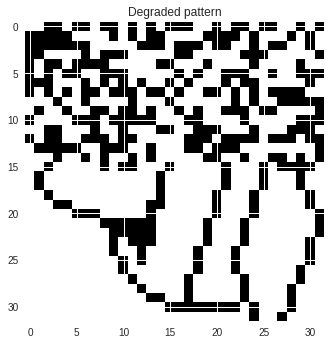

In [0]:
display_pattern(p10)

The convergence takes  2  iterations


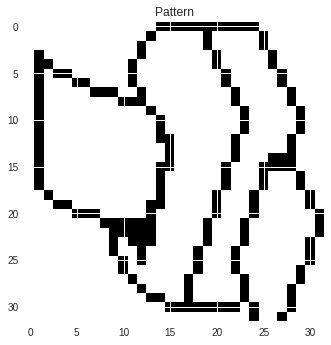

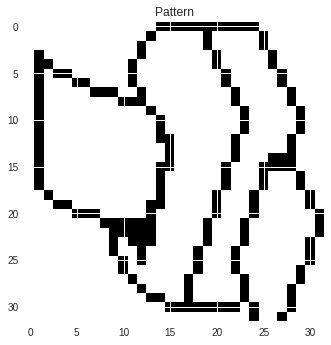

They're the same


In [0]:
new_p10,iterations,energy_list,list_x=update_rule(p10,W,"batch")
print("The convergence takes ",iterations," iterations")
display_pattern(p1)
display_pattern(new_p10)
if (np.array_equal(p1,new_p10)):
    print("They're the same")

The network can complete a degraded pattern

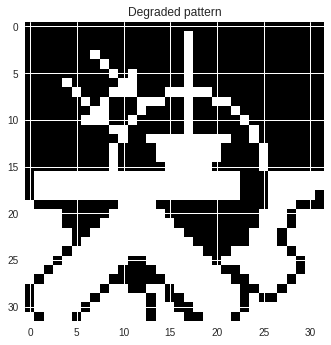

In [0]:
display_pattern(p11)

The convergence takes  3  iterations


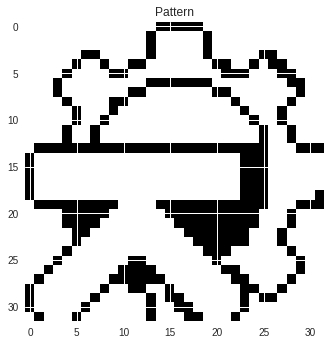

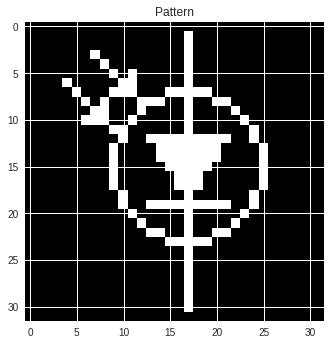

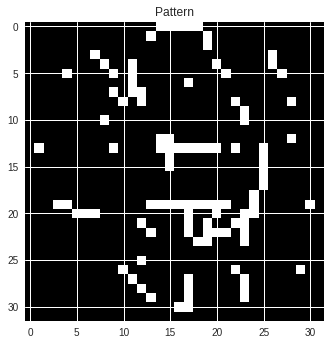

In [0]:
new_p11,iterations,energy_list,list_x=update_rule(p11,W,"batch")
print("The convergence takes ",iterations," iterations")
display_pattern(p2)
display_pattern(p3)
display_pattern(new_p11)

So the network cannot complete a pattern that is a mixture of two learnt patterns in batch mode

### Sequential update with random units

The convergence takes  3  iterations


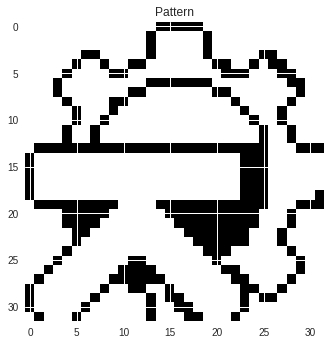

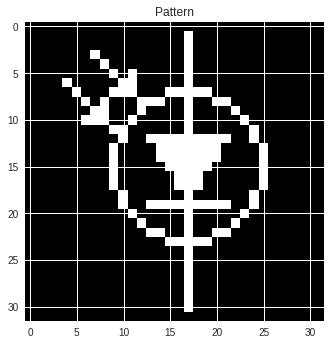

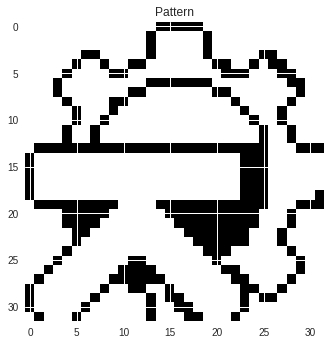

In [0]:
new_p11,iterations,energy_list,list_x=update_rule(p11,W,"sequential")
print("The convergence takes ",iterations," iterations")
display_pattern(p2)
display_pattern(p3)
display_pattern(new_p11)

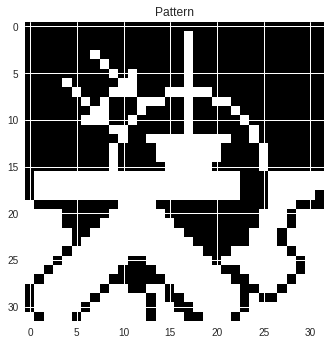

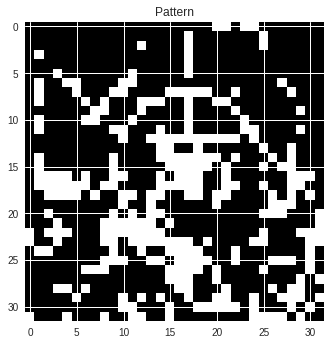

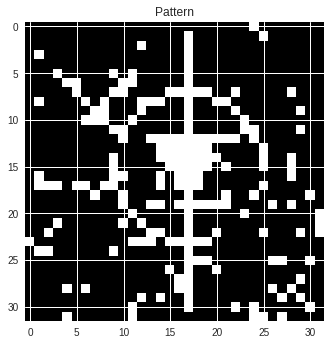

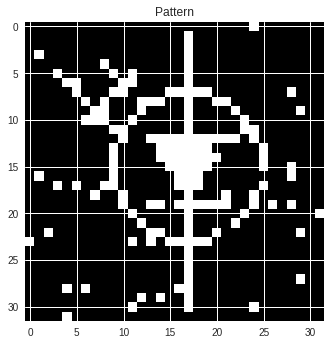

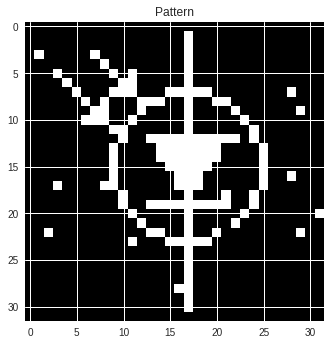

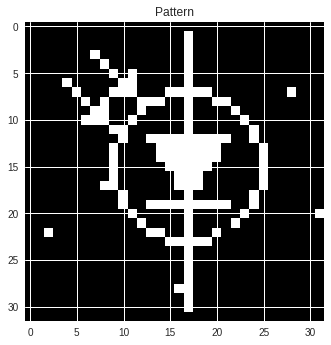

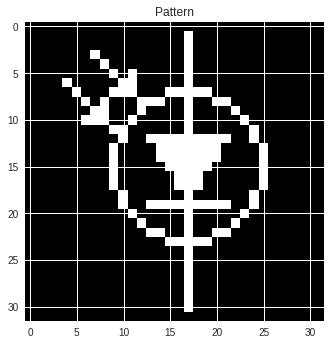

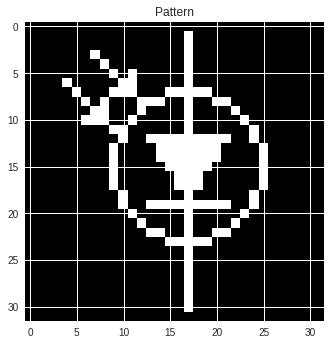

The convergence takes  7  iterations
This is the recalled pattern


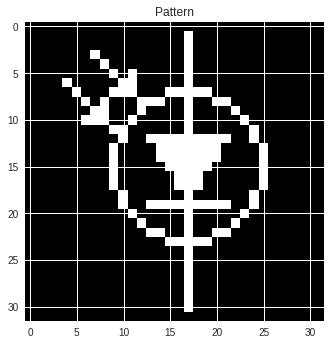

In [0]:
display_pattern(p11)
new_p11,iterations,energy_list,list_x=update_rule(p11,W,"random",display=True)
print("The convergence takes ",iterations," iterations")
print("This is the recalled pattern")
display_pattern(new_p11)

With a sequential update, the pattern converges most of the time to the pattern p3 in a few iterations
The number of iterations needed for convergence is not constant

## 3.3 Energy

In [0]:
testing_patterns=np.array([p4,p5,p6,p7,p8,p9,p10,p11])

### Energy at the different attractors

In [0]:
for i in range(len(training_patterns)):
  x=training_patterns[i]
  print("The energy at attractor p{} is {}".format(i+1,energy(x,W)))

The energy at attractor p1 is -1439.390625
The energy at attractor p2 is -1365.640625
The energy at attractor p3 is -1462.25


### Energy at the point of the distorted patterns

In [0]:
for i in range(len(testing_patterns)):
  x=testing_patterns[i]
  print("The energy at distorded pattern p{} is {}".format(i+4,energy(x,W)))

The energy at distorded pattern p4 is -720.48046875
The energy at distorded pattern p5 is -525.890625
The energy at distorded pattern p6 is -683.296875
The energy at distorded pattern p7 is -685.73046875
The energy at distorded pattern p8 is -171.546875
The energy at distorded pattern p9 is -267.51171875
The energy at distorded pattern p10 is -415.98046875
The energy at distorded pattern p11 is -173.5


### Evolution of the energy

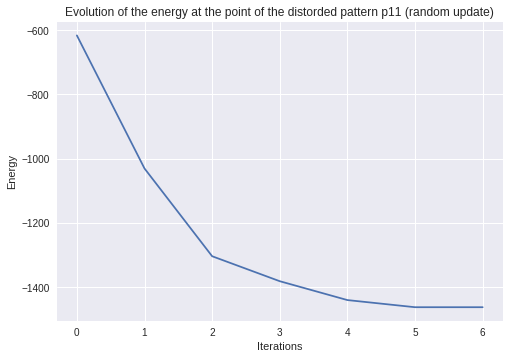

In [0]:
new_p11,iterations,energy_list,list_x=update_rule(p11,W,"random",display=False)
plt.plot(range(iterations),energy_list)
plt.xlabel("Iterations")
plt.ylabel("Energy")
plt.title("Evolution of the energy at the point of the distorded pattern p11 (random update)")
plt.show()

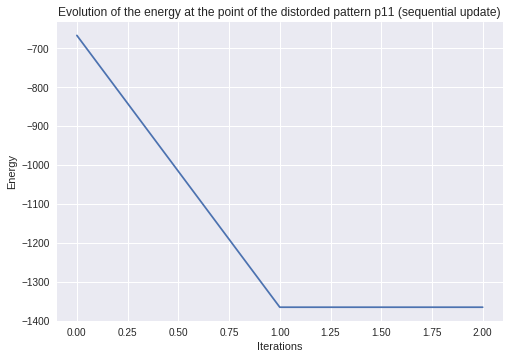

In [0]:
new_p11,iterations,energy_list,list_x=update_rule(p11,W,"sequential",display=True)
plt.plot(range(iterations),energy_list)
plt.xlabel("Iterations")
plt.ylabel("Energy")
plt.title("Evolution of the energy at the point of the distorded pattern p11 (sequential update)")
plt.show()

### Behavior with a random matrix

In [0]:
test_list=[[1,1,1],[0,0,0]]
test_vec=[0,0,0]
print(test_vec in test_list)

True


In [0]:
N1=1024
N2=8
random_W = np.random.normal(0, 1, (N1, N1))
np.fill_diagonal(random_W, 0)

random_pattern = np.random.choice([-1, 1], N1)

In [0]:
new_x,iterations,energy_list,list_x=update_rule(random_pattern,random_W,"sequential")

Iteration:  10
Iteration:  20
Iteration:  30
Iteration:  40
Iteration:  50


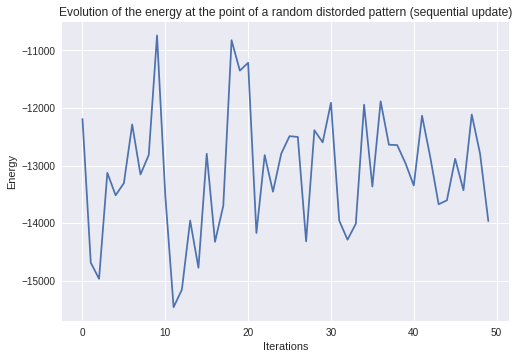

In [0]:
plt.plot(range(iterations),energy_list)
plt.xlabel("Iterations")
plt.ylabel("Energy")
plt.title("Evolution of the energy at the point of a random distorded pattern (sequential update)")
plt.show()

The energy does not always decrease as the states change, it is alternating between two states

In [0]:
W_symmetric=0.5*(random_W+random_W.T)

In [0]:
new_x,iterations,energy_list,list_x=update_rule(random_pattern,W_symmetric,"sequential")

Iteration:  10
Iteration:  20


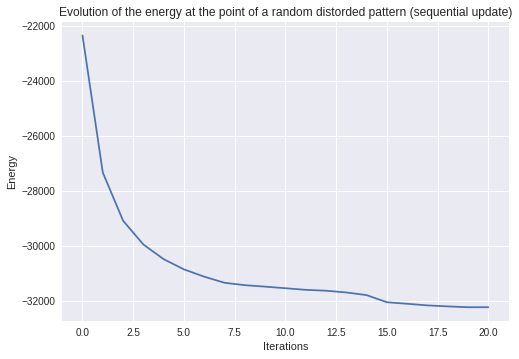

In [0]:
plt.plot(range(iterations),energy_list)
plt.xlabel("Iterations")
plt.ylabel("Energy")
plt.title("Evolution of the energy at the point of a random distorded pattern (sequential update)")
plt.show()

Now the energy is now decreasing because the matrix is symmetric

## 3.4 Distorsion Resistance

### How much noise can be removed ? 

Let's add some noise to the patterns : 

In [0]:
from random import randint
import random

#Creation of the noisy patterns
p1_deep =  np.array(p1, copy=True) 
p2_noise = np.array(p2,copy = True)
p3_noise = np.array(p3,copy = True)


#Initialization of the patterns + weights
trained_pattern = np.array([p1,p2,p3])

w1 = np.outer(p1,p1)
w2 = np.outer(p2,p2)
w3 = np.outer(p3,p3)

W= w1+w2+w3

#Flip list is going to a be a list of index of which we will swap randomly the values
flip_list = []


def add_noise(pattern, noise_level):
  d= len(pattern)
  res=np.copy(pattern)
  random_indexes = random.sample(list(np.arange(d)), int(noise_level *d / 100))
  for index in random_indexes:
    res[index] = - pattern[index]
  return(res)


#Adding noise to P1

for i in [0,10,20,30,40,50,60,70,80,90,100]:
  p1_noise = add_noise(p1_deep,i)
  tmp = update_rule(p1_noise,W,"batch")[0]
  if (np.array_equal(p1,tmp)):
    print("They're the same")
    display_pattern(p1_noise)
    display_pattern(tmp)
  else :
    print("They're different")
    display_pattern(p1_noise)
    display_pattern(tmp)
    

    

  
  

We can see that when we add 8% of noise, the pattern is not successfully restored.

### Is there any difference between the three attractors with regard to noise tolerance?

In [0]:
# Test for P2

from random import randint
import random
import matplotlib.image as mpimg




#Initialization of the patterns + weights
trained_pattern = np.array([p1,p2,p3])

w1 = np.outer(p1,p1)
w2 = np.outer(p2,p2)
w3 = np.outer(p3,p3)

W= w1+w2+w3

#Flip list is going to a be a list of index of which we will swap randomly the values


#Just another display function

def display(p,ax,title):
  img = np.reshape(p, (32,32))
  imgplot = ax.imshow(img)
  ax.set_title(title)
 

# Function to compute the mean of a list

def mean_list (list,divided_by):
  for i in range(len(list)):
    list[i] =  list [i]/divided_by
  return list


#Function that return the final noisy pattern and the error for each degree of noise

def error_noise(pattern):
  error = [0,0,0,0,0,0,0,0,0,0,0]
  pattern_copy =  np.array(pattern, copy=True) 
  for a in range(10):
    for i in [0,10,20,30,40,50,60,70,80,90,100]:
      pattern_noise = add_noise(pattern_copy,i)
      tmp = update_rule(pattern_noise,W,"batch")[0]
      error_tmp = 1*(tmp != pattern_copy)
      error_tmp =  sum(error_tmp)
      error[int(i/10)] = error[int(i/10)] + error_tmp
  return [pattern_noise,error]

[noise_p1,error_p1] = error_noise(p1)
error_p1 = mean_list(error_p1,10)

[noise_p2,error_p2] =  error_noise(p2)
error_p2 = mean_list(error_p2,10)

[noise_p3,error_p3] =  error_noise(p3)
error_p3 = mean_list(error_p3,10)

/usr/local/lib/python3.6/dist-packages/matplotlib/legend.py:936: UserWarning: Legend does not support [<matplotlib.lines.Line2D object at 0x7fd004b4c438>] instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  "aka-proxy-artists".format(orig_handle)
/usr/local/lib/python3.6/dist-packages/matplotlib/legend.py:936: UserWarning: Legend does not support [<matplotlib.lines.Line2D object at 0x7fd0018bc1d0>] instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  "aka-proxy-artists".format(orig_handle)
/usr/local/lib/python3.6/dist-packages/matplotlib/legend.py:936: UserWarning: Legend does not support [<matplotlib.lines.Line2D object at 0x7fd004b4cbe0>] instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-ar

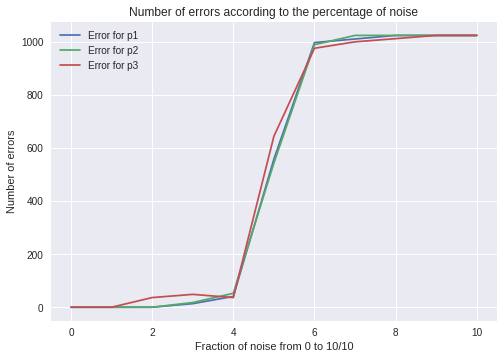

In [0]:
plt.figure()
line_1 = plt.plot(np.arange(0,11),error_p1,label = 'Error for p1')
line_2 = plt.plot(np.arange(0,11),error_p2, label = 'Error for p2')
line_3 = plt.plot(np.arange(0,11), error_p3, label = "Error for p3")
plt.title("Number of errors according to the percentage of noise")
plt.xlabel("Fraction of noise from 0 to 10/10")
plt.ylabel('Number of errors')
plt.legend((line_1, line_2,line_3), ('label1', 'label2','label3'))
plt.legend()
plt.show()


It seems that you can't remove more than 40% of noise. This value doesn't change whatever the pattern we choose.

It does not converge to the right attractor but always to the exact contrary. The single iteration doesn't help to change that. There are other attractors : insert screen.

#### 3.5 Capacities

In [0]:
# Test for P2

from random import randint
import random
import matplotlib.image as mpimg




#Initialization of the patterns + weights
trained_pattern = np.array([p1])
trained_full_pattern = [p1,p2,p3,p4,p5,p6,p7,p8,p9,p10]

w1 = np.outer(p1,p1)



W= w1

#Flip list is going to a be a list of index of which we will swap randomly the values
p1_copy =  np.array(p1, copy=True) 
error_add = []
for i in range(1,7):
  p_tmp = trained_full_pattern[i]
  trained_pattern = trained_pattern + np.array([p_tmp])
  w_tmp = np.outer(p_tmp,p_tmp)
  W = W + w_tmp
  p1_noise = add_noise(p1_copy,20)
  tmp = update_rule(p1_noise,W,"batch")[0]
  error_tmp = 1*(tmp != p1_copy)
  error_tmp =  sum(error_tmp)
  error_add.append(error_tmp)



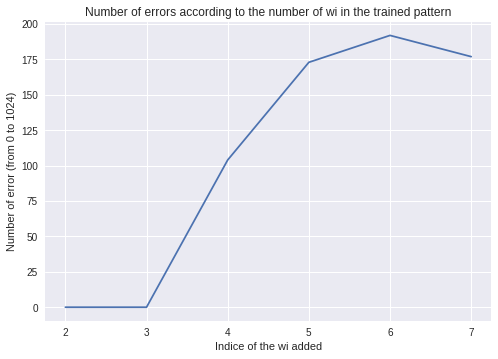

In [0]:
plt.plot(np.arange(2,8),error_add)
plt.title("Number of errors according to the number of wi in the trained pattern")
plt.ylabel("Number of error (from 0 to 1024)")
plt.xlabel("Indice of the wi added")
plt.show()

The drop in performance was gradual, it changes when you add some wi.

In [0]:
import random

patterns = np.array([p1, p2, p3, p4, p5, p6, p7, p8, p9])
noisy_patterns = []

noise_level = 20
for i in range(9):
  noisyp = [add_noise(patterns[i], noise_level) for k in range(20)]
  noisy_patterns += [noisyp]

success = np.zeros(6)
rand_index = np.arange(9)
size_pat = patterns.shape[1]

nb_iter = 50

for iter in range(nb_iter):
  
  if (not(iter%10)):
    print("iter=",iter)

  #suffling the init patterns to learn
  np.random.shuffle(rand_index)

  #training the network
  W = np.zeros((size_pat,size_pat))
  for init in range(3):
    W += np.outer(patterns[rand_index[init]], patterns[rand_index[init]])

  #adding new patterns one by one and computing the recall success each time 
  for i in range(3,9): #begin with p4, end with p9
    
    #adding p_i
    W += np.outer(patterns[rand_index[i]], patterns[rand_index[i]])
    
    #run the tests for k = 1 to i
    recall_success = 0
    for k in range(i):
      rightPatternToFind = patterns[rand_index[k]]
      for j in range(len(noisy_patterns[0])):
        res = recall(W, noisy_patterns[rand_index[k]][j])
        res = recall(W, res)
        #fig,ax = plt.subplots()
        #display(res, ax,"")
        if np.array_equal(res, rightPatternToFind):
          recall_success +=1
    recall_success /= len(noisy_patterns[0])*(i+1)
    success[i-3] += recall_success

#normalizing
for j in range(6):
  success[j] /= nb_iter

plt.plot(np.arange(9)+np.ones(9),np.concatenate((np.ones(3),success)))
plt.xlabel("Number of patterns stored")
plt.ylabel("Recall success")
plt.show()

In [0]:
# Creation of some random patterns :

from random import randint 

#This function creates random paterns but you can change the number of random values.
def rand_pattern_creator (number_of_random_values):
  
  rand_pattern = np.zeros((1024,))
  flip_list = []

  noise = number_of_random_values

  for a in range(noise):
    tmp_int = randint(0,1023)
    flip_list.append(tmp_int)
  for j in range(noise):
    rand_pattern[flip_list[j]] = 1

  #display_pattern(rand_pattern)
  return (rand_pattern)

#We create a few random patterns by putting a probability of 50% for each random pattern.

rand_pattern_list = []

for i in range(0,100):
  rand_pattern_list.append(rand_pattern_creator(512))






In [0]:
# Now we try this with adding these random patterns instead of the pictures :

trained_pattern = np.array([p1])
trained_full_pattern = rand_pattern_list
w1 = np.outer(p1,p1)



W= w1

#Flip list is going to a be a list of index of which we will swap randomly the values
p1_copy =  np.array(p1, copy=True) 
error_add_random = []
for i in range(1,98):
  p_tmp = trained_full_pattern[i]
  trained_pattern = trained_pattern + np.array([p_tmp])
  w_tmp = np.outer(p_tmp,p_tmp)
  W = W + w_tmp
  p1_noise = add_noise(p1_copy,0)
  tmp = update_rule(p1_noise,W,"batch")[0]
  error_tmp = 1*(tmp != p1_copy)
  error_tmp =  sum(error_tmp)
  error_add_random.append(error_tmp)


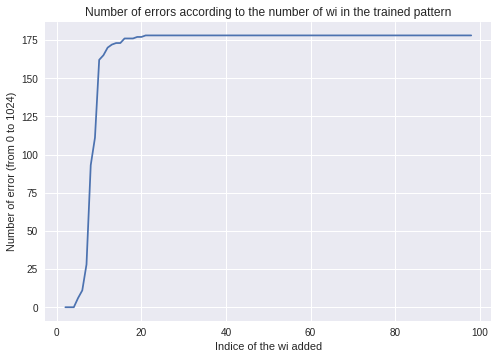

In [0]:
plt.plot(np.arange(2,99),error_add_random)
plt.title("Number of errors according to the number of wi in the trained pattern")
plt.ylabel("Number of error (from 0 to 1024)")
plt.xlabel("Indice of the wi added")
plt.show()

We can see that the problem is not like before when we add some random patterns. We can store more patterns than before without noticing any real error.

In [0]:
# Here we create a 300 random pattern : 

from random import randint 

#This function creates random paterns but you can change the number of random values.
def rand_pattern_creator (number_of_random_values):
  
  rand_pattern = np.zeros((100,))
  flip_list = []

  noise = number_of_random_values

  for a in range(noise):
    tmp_int = randint(0,99)
    flip_list.append(tmp_int)
  for j in range(noise):
    rand_pattern[flip_list[j]] = 1

  #display_pattern(rand_pattern)
  return (rand_pattern)

#We create a few random patterns by putting a probability of 50% for each random pattern.

rand_patterns = []

for i in range(0,300):
  rand_patterns.append(rand_pattern_creator(50))
  




In [0]:
# We're going to see which remain stable :


#create 300 random patterns
random_patterns = [np.random.choice([-1, 1], 100) for k in range(300)]
patterns = np.array(random_patterns)
noisy_patterns = []

#create 300 noisy versions
noise_level = 20
for i in range(300):
  noisyp = [add_noise(patterns[i], 20) for k in range(1)]
  noisy_patterns += noisyp

# tune simulation
success = np.zeros(300)


trained_pattern = rand_patterns[0]
trained_full_pattern = rand_patterns

W = np.zeros((100,100))
W += np.outer(trained_full_pattern[0],trained_full_pattern[0])
error = np.zeros((300))


def recall(W,x):
  x = np.sign(W.dot(x))
  return(x)

#Flip list is going to a be a list of index of which we will swap randomly the values
p1_copy =  np.array(p1, copy=True) 
error_add_test = []

for i in range(1,300):
  
  
  W += np.outer(trained_full_pattern[i],trained_full_pattern[i])
  
  recall_success = 0
  for j in range(0, i-1):
    pattern_to_find = trained_full_pattern[j]
    tmp = recall(W,trained_full_pattern[j])
    if (np.array_equal(tmp, pattern_to_find)):
      recall_sucess += 1
  recall_success /= i
  success[i]+= recall_success
      
  
    
    
  

W = produit scalaire avec des xi^2 sur la diagonale, vecteurs colinéaires donc grosse valeur sur la diagonale et le reste petite valeur donc presque négligeable, ce qui compte c'est la diagonale donc presque comme multiplier par l'identité donc retrouver le truc

iter= 0
argmax:  299


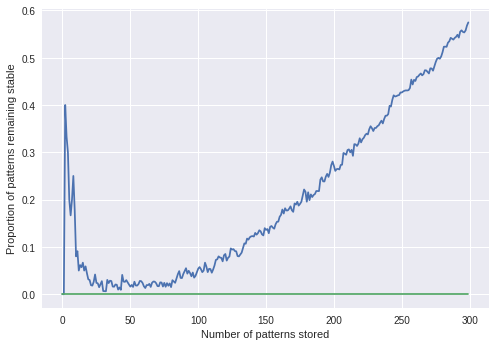

In [0]:
import random


def recall(W,x):
  x = np.sign(W.dot(x))
  return(x)

number_of_patterns = 300
size_of_network = 100 #initial value: 100

#create 300 random patterns
random_patterns = [np.random.choice([-1, 1], size_of_network) for k in range(number_of_patterns)]
patterns = np.array(random_patterns)
noisy_patterns = []

#create 300 noisy versions
noise_level = 20
for i in range(number_of_patterns):
  noisyp = [add_noise(patterns[i], noise_level) for k in range(1)]
  noisy_patterns += noisyp

# tune simulation
success = np.zeros(number_of_patterns)
success_noisy = np.zeros(number_of_patterns)
rand_index = np.arange(number_of_patterns)
size_pat = size_of_network

nb_iter = 5

for iter in range(nb_iter):
  
  if (not(iter%5)):
    print("iter=",iter)

  #suffling the init patterns to learn
  np.random.shuffle(rand_index)

  #training the network
  W = np.zeros((size_pat,size_pat))
  W_noisy = W
  for init in range(1):
    W += np.outer(patterns[rand_index[init]], patterns[rand_index[init]])
    W_noisy += np.outer(noisy_patterns[rand_index[init]], noisy_patterns[rand_index[init]])

  #adding new patterns one by one and computing the recall success each time 
  for i in range(1,number_of_patterns): #begin with p2 to p300
    
    #adding p_i
    W += np.outer(patterns[rand_index[i]], patterns[rand_index[i]])
    W_noisy += np.outer(noisy_patterns[rand_index[i]], noisy_patterns[rand_index[i]])
    
    #run the tests for k = 1 to i
    recall_success = 0
    recall_success_noisy = 0
    for k in range(i-1):
      rightPatternToFind = patterns[rand_index[k]]
      rightPatternToFind_noisy = patterns[rand_index[k]]
      res = recall(W, patterns[rand_index[k]])
      res_noisy = recall(W, noisy_patterns[rand_index[k]])
      if np.array_equal(res, rightPatternToFind):
        recall_success +=1
      if np.array_equal(res_noisy, rightPatternToFind_noisy):
        recall_success_noisy +=1
    recall_success /= i
    recall_success_noisy /= i
    success[i] += recall_success
    success_noisy[i] += recall_success_noisy

#normalizing
for j in range(number_of_patterns):
  success[j] /= nb_iter
  success_noisy[j] /= nb_iter
  
print("argmax: ",np.argmax(success))

success_1 = success
plt.plot(success)
plt.plot(success_noisy)
plt.xlabel("Number of patterns stored")
plt.ylabel("Proportion of patterns remaining stable")
plt.show()

iter= 0
argmax:  10


/usr/local/lib/python3.6/dist-packages/matplotlib/legend.py:936: UserWarning: Legend does not support [<matplotlib.lines.Line2D object at 0x7fd004a1dbe0>] instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  "aka-proxy-artists".format(orig_handle)
/usr/local/lib/python3.6/dist-packages/matplotlib/legend.py:936: UserWarning: Legend does not support [<matplotlib.lines.Line2D object at 0x7fd0043a8b70>] instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  "aka-proxy-artists".format(orig_handle)


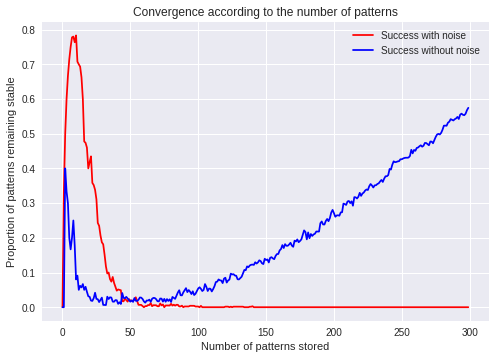

In [0]:
number_of_patterns = 300
size_of_network = 100

#create 300 random patterns
random_patterns = [np.random.choice([-1, 1], size_of_network) for k in range(number_of_patterns)]
patterns = np.array(random_patterns)
noisy_patterns = []

#create 300 noisy versions
noise_level = 5
for i in range(number_of_patterns):
  noisyp = [add_noise(patterns[i], noise_level) for k in range(1)]
  noisy_patterns += noisyp

# tune simulation
success = np.zeros(number_of_patterns)
rand_index = np.arange(number_of_patterns)
size_pat = size_of_network

nb_iter = 5

for iter in range(nb_iter):
  
  if (not(iter%5)):
    print("iter=",iter)

  #suffling the init patterns to learn
  np.random.shuffle(rand_index)

  #training the network
  W = np.zeros((size_pat,size_pat))
  for init in range(1):
    W += np.outer(patterns[rand_index[init]], patterns[rand_index[init]])

  #adding new patterns one by one and computing the recall success each time 
  for i in range(1,number_of_patterns): #begin with p2 to p300
    
    #adding p_i
    W += np.outer(patterns[rand_index[i]], patterns[rand_index[i]])
    
    #run the tests for k = 1 to i
    recall_success = 0
    for k in range(i-1):
      rightPatternToFind = patterns[rand_index[k]]
      res = recall(W, noisy_patterns[rand_index[k]])
      if np.array_equal(res, rightPatternToFind):
        recall_success +=1
    recall_success /= (i+1)
    success[i-1] += recall_success

#normalizing
for j in range(number_of_patterns):
  success[j] /= nb_iter
  
print("argmax: ",np.argmax(success))
  
success_test = success
line_1 = plt.plot(success,color = 'r', label = 'Success with noise')
line_2 = plt.plot(success_1, color ='b', label = 'Success without noise')
plt.xlabel("Number of patterns stored")
plt.ylabel("Proportion of patterns remaining stable")
plt.legend((line_1, line_2), ('label1', 'label2'))
plt.title('Convergence according to the number of patterns')
plt.legend()
plt.show()


Now we will try to delete the diagonals : 

In [0]:
#DELETING DIAGONAL

def delete_diag(W):
  for i in range(W.shape[0]):
    W[i][i] = 0
  return W

iter= 0


/usr/local/lib/python3.6/dist-packages/matplotlib/legend.py:936: UserWarning: Legend does not support [<matplotlib.lines.Line2D object at 0x7fd0018dcc18>] instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  "aka-proxy-artists".format(orig_handle)
/usr/local/lib/python3.6/dist-packages/matplotlib/legend.py:936: UserWarning: Legend does not support [<matplotlib.lines.Line2D object at 0x7fd004a1ab00>] instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  "aka-proxy-artists".format(orig_handle)


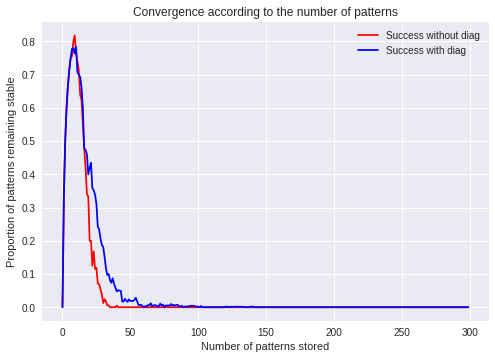

In [0]:
#@title ##### What is the maximum number of retrievable patterns for this network? { form-width: "20%" }

number_of_patterns = 300
size_of_network = 100 #initial value: 100

#create 300 random patterns
random_patterns = [np.random.choice([-1, 1], size_of_network) for k in range(number_of_patterns)]
patterns = np.array(random_patterns)
noisy_patterns = []

#create 300 noisy versions
noise_level = 20
for i in range(number_of_patterns):
  noisyp = [add_noise(patterns[i], noise_level) for k in range(1)]
  noisy_patterns += noisyp

# tune simulation
success = np.zeros(number_of_patterns)
rand_index = np.arange(number_of_patterns)
size_pat = size_of_network

nb_iter = 5

for iter in range(nb_iter):
  
  if (not(iter%5)):
    print("iter=",iter)

  #suffling the init patterns to learn
  np.random.shuffle(rand_index)

  #training the network
  W = np.zeros((size_pat,size_pat))
  for init in range(1):
    W += np.outer(patterns[rand_index[init]], patterns[rand_index[init]])

  W = delete_diag(W)
  #adding new patterns one by one and computing the recall success each time 
  for i in range(1,number_of_patterns): #begin with p2 to p300
    
    #adding p_i
    W += np.outer(patterns[rand_index[i]], patterns[rand_index[i]])
    W = delete_diag(W)
    
    #run the tests for k = 1 to i
    recall_success = 0
    for k in range(i-1):
      rightPatternToFind = patterns[rand_index[k]]
      res = recall(W, patterns[rand_index[k]])
      if np.array_equal(res, rightPatternToFind):
        recall_success +=1
    recall_success /= (i+1)
    success[i-1] += recall_success

#normalizing
for j in range(number_of_patterns):
  success[j] /= nb_iter
  
  
success_diag = success
line_1 = plt.plot(success_diag,color = 'r', label = 'Success without diag')
line_2 = plt.plot(success_test, color ='b', label = 'Success with diag')
plt.xlabel("Number of patterns stored")
plt.ylabel("Proportion of patterns remaining stable")
plt.legend((line_1, line_2), ('label1', 'label2'))
plt.title('Convergence according to the number of patterns')
plt.legend()
plt.show()


iter= 0
iter= 5
iter= 10
iter= 15
iter= 20
iter= 25


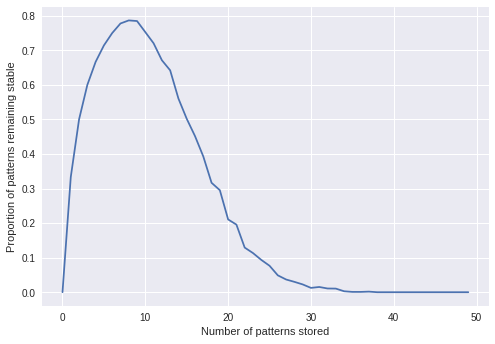

8

In [0]:
#@title ##### What is the maximum number of retrievable patterns for this network? { form-width: "20%" }

number_of_patterns = 50
size_of_network = 100 #initial value: 100

#create 300 random patterns
random_patterns = [np.random.choice([-1, 1], size_of_network) for k in range(number_of_patterns)]
patterns = np.array(random_patterns)
noisy_patterns = []

#create 300 noisy versions
noise_level = 20
for i in range(number_of_patterns):
  noisyp = [add_noise(patterns[i], noise_level) for k in range(1)]
  noisy_patterns += noisyp

# tune simulation
success = np.zeros(number_of_patterns)
rand_index = np.arange(number_of_patterns)
size_pat = size_of_network

nb_iter = 30

for iter in range(nb_iter):
  
  if (not(iter%5)):
    print("iter=",iter)

  #suffling the init patterns to learn
  np.random.shuffle(rand_index)

  #training the network
  W = np.zeros((size_pat,size_pat))
  for init in range(1):
    W += np.outer(patterns[rand_index[init]], patterns[rand_index[init]])

  W = delete_diag(W)
  #adding new patterns one by one and computing the recall success each time 
  for i in range(1,number_of_patterns): #begin with p2 to p300
    
    #adding p_i
    W += np.outer(patterns[rand_index[i]], patterns[rand_index[i]])
    W = delete_diag(W)
    
    #run the tests for k = 1 to i
    recall_success = 0
    for k in range(i-1):
      rightPatternToFind = patterns[rand_index[k]]
      res = recall(W, patterns[rand_index[k]])
      if np.array_equal(res, rightPatternToFind):
        recall_success +=1
    recall_success /= (i+1)
    success[i-1] += recall_success

#normalizing
for j in range(number_of_patterns):
  success[j] /= nb_iter
  
  
success1 = success
plt.plot(success)
plt.xlabel("Number of patterns stored")
plt.ylabel("Proportion of patterns remaining stable")
plt.show()
plt.show()

np.argmax(success)

iter= 0
iter= 5
iter= 10
iter= 15
iter= 20
iter= 25


/usr/local/lib/python3.6/dist-packages/matplotlib/legend.py:936: UserWarning: Legend does not support [<matplotlib.lines.Line2D object at 0x7fd004a750f0>] instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  "aka-proxy-artists".format(orig_handle)
/usr/local/lib/python3.6/dist-packages/matplotlib/legend.py:936: UserWarning: Legend does not support [<matplotlib.lines.Line2D object at 0x7fd001938ba8>] instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  "aka-proxy-artists".format(orig_handle)


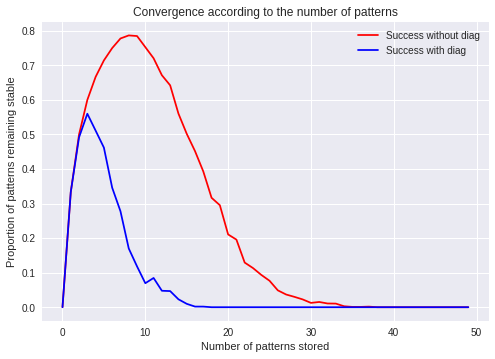

3

In [0]:
number_of_patterns = 50
size_of_network = 100 #initial value: 100

#create 300 random patterns
random_patterns = [np.random.choice([-1, 1], size_of_network) for k in range(number_of_patterns)]
patterns = np.array(random_patterns)
noisy_patterns = []

#create 300 noisy versions
noise_level = 20
for i in range(number_of_patterns):
  noisyp = [add_noise(patterns[i], noise_level) for k in range(1)]
  noisy_patterns += noisyp

# tune simulation
success = np.zeros(number_of_patterns)
rand_index = np.arange(number_of_patterns)
size_pat = size_of_network

nb_iter = 30

for iter in range(nb_iter):
  
  if (not(iter%5)):
    print("iter=",iter)

  #suffling the init patterns to learn
  np.random.shuffle(rand_index)

  #training the network
  W = np.zeros((size_pat,size_pat))
  for init in range(1):
    W += np.outer(patterns[rand_index[init]], patterns[rand_index[init]])

  W = delete_diag(W)
  #adding new patterns one by one and computing the recall success each time 
  for i in range(1,number_of_patterns): #begin with p2 to p300
    
    #adding p_i
    W += np.outer(patterns[rand_index[i]], patterns[rand_index[i]])
    W = delete_diag(W)
    
    #run the tests for k = 1 to i
    recall_success = 0
    for k in range(i-1):
      rightPatternToFind = patterns[rand_index[k]]
      res = recall(W, noisy_patterns[rand_index[k]])
      if np.array_equal(res, rightPatternToFind):
        recall_success +=1
    recall_success /= (i+1)
    success[i-1] += recall_success

#normalizing
for j in range(number_of_patterns):
  success[j] /= nb_iter


success_diag = success
line_1 = plt.plot(success1,color = 'r', label = 'Success without diag')
line_2 = plt.plot(success, color ='b', label = 'Success with diag')
plt.xlabel("Number of patterns stored")
plt.ylabel("Proportion of patterns remaining stable")
plt.legend((line_1, line_2), ('label1', 'label2'))
plt.title('Convergence according to the number of patterns')
plt.legend()
plt.show()

np.argmax(success)

iter= 0
iter= 5
iter= 10
iter= 15
iter= 20
iter= 25


/usr/local/lib/python3.6/dist-packages/matplotlib/legend.py:936: UserWarning: Legend does not support [<matplotlib.lines.Line2D object at 0x7fd004976fd0>] instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  "aka-proxy-artists".format(orig_handle)
/usr/local/lib/python3.6/dist-packages/matplotlib/legend.py:936: UserWarning: Legend does not support [<matplotlib.lines.Line2D object at 0x7fd00172fa58>] instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  "aka-proxy-artists".format(orig_handle)


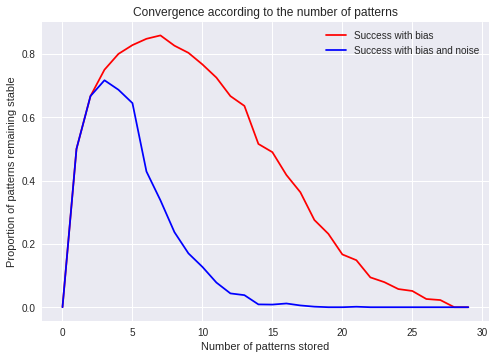

In [0]:
#@title #####What happens if you bias the patterns, e.g. use sign(0.5+randn(300,100)) or something similar to make them contain more +1? How does this relate to the capacity results of the picture patterns? { form-width: "20%" }


number_of_patterns = 30
size_of_network = 100 #initial value: 100

#create 300 random patterns
random_patterns = np.array([np.random.choice([-1, 1], size_of_network, p=[0.5, 0.5]) for k in range(number_of_patterns)])
patterns = np.array(random_patterns)
noisy_patterns = []

#create 300 noisy versions
noise_level = 20
for i in range(number_of_patterns):
  noisyp = [add_noise(patterns[i], noise_level) for k in range(1)]
  noisy_patterns += noisyp

# tune simulation
success_bias = np.zeros(number_of_patterns)
success_bias_noisy = np.zeros(number_of_patterns)
rand_index = np.arange(number_of_patterns)
size_pat = size_of_network

nb_iter = 30

for iter in range(nb_iter):
  
  if (not(iter%5)):
    print("iter=",iter)

  #suffling the init patterns to learn
  np.random.shuffle(rand_index)

  #training the network
  W = np.zeros((size_pat,size_pat))
  for init in range(1):
    W += np.outer(patterns[rand_index[init]], patterns[rand_index[init]])

  W = delete_diag(W)
  #adding new patterns one by one and computing the recall success each time 
  for i in range(1,number_of_patterns): #begin with p2 to p300
    
    #adding p_i
    W += np.outer(patterns[rand_index[i]], patterns[rand_index[i]])
    W = delete_diag(W)
    
    #run the tests for k = 1 to i
    recall_success = 0
    recall_success_noisy = 0
    for k in range(i-1):
      rightPatternToFind = patterns[rand_index[k]]
      res = recall(W, patterns[rand_index[k]])
      res2 = recall(W, noisy_patterns[rand_index[k]])
      if np.array_equal(res, rightPatternToFind):
        recall_success +=1
      if np.array_equal(res2, rightPatternToFind):
        recall_success_noisy +=1
    recall_success /= i
    recall_success_noisy /= i
    success_bias[i-1] += recall_success
    success_bias_noisy[i-1] += recall_success_noisy

#normalizing
for j in range(number_of_patterns):
  success_bias[j] /= nb_iter
  success_bias_noisy[j] /= nb_iter
  


success_tmp = success_bias

line_1 = plt.plot(success_bias,color = 'r', label = 'Success with bias')
line_2 = plt.plot(success_bias_noisy, color ='b', label = 'Success with bias and noise')
plt.xlabel("Number of patterns stored")
plt.ylabel("Proportion of patterns remaining stable")
plt.legend((line_1, line_2), ('label1', 'label2'))
plt.title('Convergence according to the number of patterns')
plt.legend()
plt.show()



iter= 0
iter= 5
iter= 10
iter= 15
iter= 20
iter= 25


/usr/local/lib/python3.6/dist-packages/matplotlib/legend.py:936: UserWarning: Legend does not support [<matplotlib.lines.Line2D object at 0x7fd0019dcac8>] instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  "aka-proxy-artists".format(orig_handle)
/usr/local/lib/python3.6/dist-packages/matplotlib/legend.py:936: UserWarning: Legend does not support [<matplotlib.lines.Line2D object at 0x7fd0048b84e0>] instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  "aka-proxy-artists".format(orig_handle)


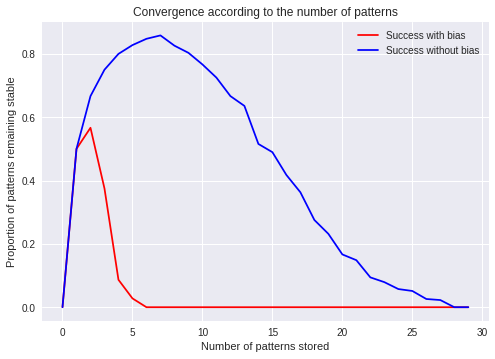

In [0]:
#@title #####What happens if you bias the patterns, e.g. use sign(0.5+randn(300,100)) or something similar to make them contain more +1? How does this relate to the capacity results of the picture patterns? { form-width: "20%" }


number_of_patterns = 30
size_of_network = 100 #initial value: 100

#create 300 random patterns
random_patterns = np.array([np.random.choice([-1, 1], size_of_network, p=[0.75, 0.25]) for k in range(number_of_patterns)])
patterns = np.array(random_patterns)
noisy_patterns = []

#create 300 noisy versions
noise_level = 20
for i in range(number_of_patterns):
  noisyp = [add_noise(patterns[i], noise_level) for k in range(1)]
  noisy_patterns += noisyp

# tune simulation
success_bias = np.zeros(number_of_patterns)
success_bias_noisy = np.zeros(number_of_patterns)
rand_index = np.arange(number_of_patterns)
size_pat = size_of_network

nb_iter = 30

for iter in range(nb_iter):
  
  if (not(iter%5)):
    print("iter=",iter)

  #suffling the init patterns to learn
  np.random.shuffle(rand_index)

  #training the network
  W = np.zeros((size_pat,size_pat))
  for init in range(1):
    W += np.outer(patterns[rand_index[init]], patterns[rand_index[init]])

  W = delete_diag(W)
  #adding new patterns one by one and computing the recall success each time 
  for i in range(1,number_of_patterns): #begin with p2 to p300
    
    #adding p_i
    W += np.outer(patterns[rand_index[i]], patterns[rand_index[i]])
    W = delete_diag(W)
    
    #run the tests for k = 1 to i
    recall_success = 0
    recall_success_noisy = 0
    for k in range(i-1):
      rightPatternToFind = patterns[rand_index[k]]
      res = recall(W, patterns[rand_index[k]])
      res2 = recall(W, noisy_patterns[rand_index[k]])
      if np.array_equal(res, rightPatternToFind):
        recall_success +=1
      if np.array_equal(res2, rightPatternToFind):
        recall_success_noisy +=1
    recall_success /= i
    recall_success_noisy /= i
    success_bias[i-1] += recall_success
    success_bias_noisy[i-1] += recall_success_noisy

#normalizing
for j in range(number_of_patterns):
  success_bias[j] /= nb_iter
  success_bias_noisy[j] /= nb_iter
  



line_1 = plt.plot(success_bias,color = 'r', label = 'Success with bias')
line_2 = plt.plot(success_tmp, color ='b', label = 'Success without bias')
plt.xlabel("Number of patterns stored")
plt.ylabel("Proportion of patterns remaining stable")
plt.legend((line_1, line_2), ('label1', 'label2'))
plt.title('Convergence according to the number of patterns')
plt.legend()
plt.show()

